# New Section

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from wordcloud import WordCloud

In [ ]:
# Load the dataset
data = pd.read_csv('Dataset_5971.csv')
data['LABEL'] = data['LABEL'].str.lower()


# Display basic information about the dataset
print("Basic Info:")
data.info()

# Show the first few rows of the dataset
print("\nFirst few rows:")
print(data.head())



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB

First few rows:
      LABEL                                               TEXT URL EMAIL PHONE
0       ham  Your opinion about me? 1. Over 2. Jada 3. Kusr...  No    No    No
1       ham  What's up? Do you want me to come online? If y...  No    No    No
2       ham                       So u workin overtime nigpun?  No    No    No
3       ham  Also sir, i sent you an email about how to log...  No    No    No
4  smishing  Please Stay At Home. To encourage the notion o...  No    No    No



Missing Values:
LABEL    0
TEXT     0
URL      0
EMAIL    0
PHONE    0
dtype: int64

Statistical Summary:
       LABEL                                               TEXT   URL EMAIL  \
count   5971                                               5971  5971  5971   
unique     3                                               5949     2     2   
top      ham  The greatest test of courage on earth is to be...    No    No   
freq    4844                                                  2  5764  5952   

       PHONE  
count   5971  
unique     2  
top       No  
freq    5127  


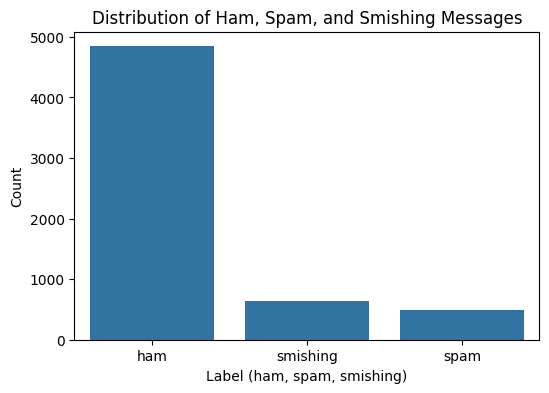

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Get a statistical summary of the dataset (ignores non-numeric columns)
print("\nStatistical Summary:")
print(data.describe(include='all'))

# Visualize the distribution of the 'LABEL' column (ham, spam, smishing)
plt.figure(figsize=(6,4))
sns.countplot(x='LABEL', data=data)
plt.title('Distribution of Ham, Spam, and Smishing Messages')
plt.xlabel('Label (ham, spam, smishing)')
plt.ylabel('Count')
plt.show()


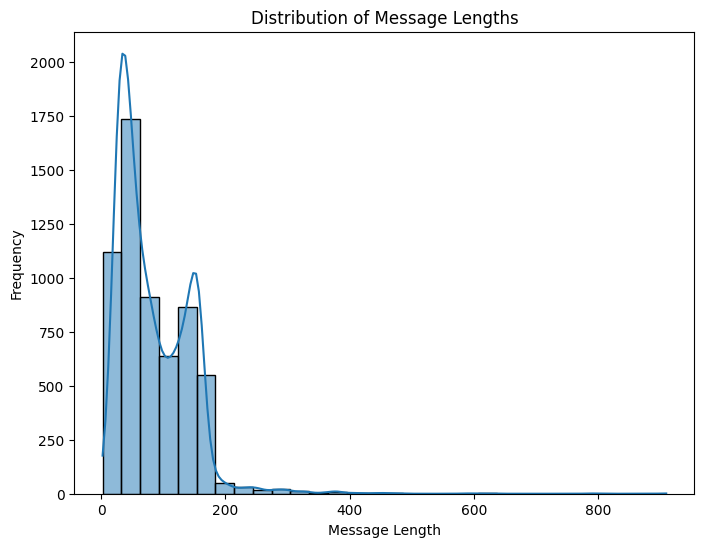

In [ ]:
# Analyze the length of the text messages in the dataset
data['message_length'] = data['TEXT'].apply(len)

# Plot distribution of message lengths
plt.figure(figsize=(8,6))
sns.histplot(data['message_length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


Message Length by Class:
           count        mean        std   min    25%    50%    75%    max
LABEL                                                                    
ham       4844.0   70.704583  56.154333   2.0   34.0   53.0   91.0  910.0
smishing   638.0  139.586207  32.541840  34.0  127.0  146.0  156.0  383.0
spam       489.0  133.897751  34.189889  18.0  118.0  143.0  156.0  379.0


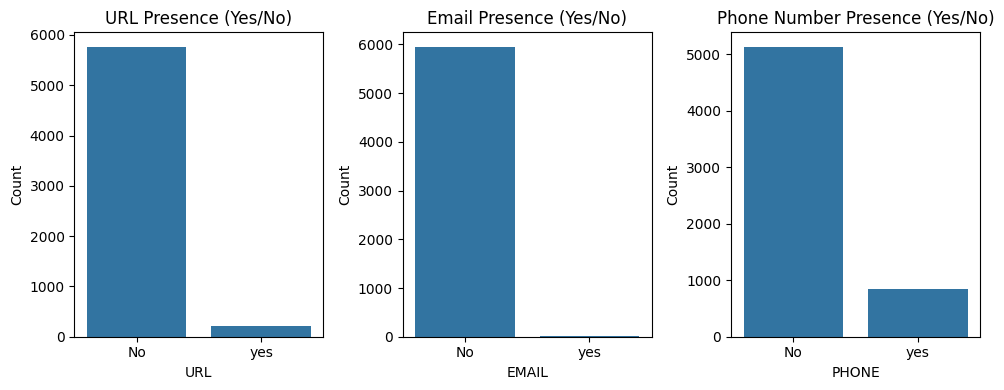

In [ ]:
# Group by 'LABEL' to analyze message length statistics
print("\nMessage Length by Class:")
print(data.groupby('LABEL')['message_length'].describe())

# Check the distribution of URL, EMAIL, and PHONE presence (yes/no categories)
plt.figure(figsize=(10,4))

# URL presence
plt.subplot(1,3,1)
sns.countplot(x='URL', data=data)
plt.title('URL Presence (Yes/No)')
plt.xlabel('URL')
plt.ylabel('Count')

# EMAIL presence
plt.subplot(1,3,2)
sns.countplot(x='EMAIL', data=data)
plt.title('Email Presence (Yes/No)')
plt.xlabel('EMAIL')
plt.ylabel('Count')

# PHONE presence
plt.subplot(1,3,3)
sns.countplot(x='PHONE', data=data)
plt.title('Phone Number Presence (Yes/No)')
plt.xlabel('PHONE')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



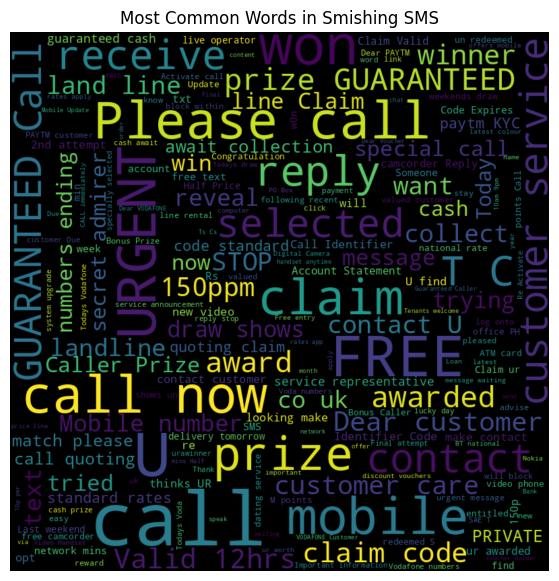

In [ ]:
# Explore common words in smishing messages
from collections import Counter
from wordcloud import WordCloud

# Filter smishing messages
smishing_messages = data[data['LABEL'] == 'smishing']['TEXT']
all_words = ' '.join([text for text in smishing_messages])
wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(all_words)

# Display the word cloud for smishing messages
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Smishing SMS")
plt.show()


**Pre-processing**

In [ ]:
data['LABEL_num'] = data['LABEL'].map({'ham': 0, 'spam': 1, 'smishing': 2})

In [ ]:
# Label encoding: Convert 'ham', 'spam', 'smishing' to numerical values

# Label encoding: Convert 'ham', 'spam', 'smishing' to numerical values

# Splitting into features and labels
X = data['TEXT']
y = data['LABEL_num']

#Check for missing values (NaN) in 'y' and handle them.
# You can either remove rows with NaN or replace them with a suitable value.
y.fillna(value= -1, inplace=True) # Example: Replace NaN with -1

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


**TF-IDF Feature Extraction**

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Logistic Regression and SVM Classifier**

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

# Predictions and Evaluation for Logistic Regression
y_pred_logreg = logreg.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))

# SVM Classifier
svm = SVC()
svm.fit(X_train_tfidf, y_train)

# Predictions and Evaluation for SVM
y_pred_svm = svm.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))




Logistic Regression Accuracy: 0.9523012552301255
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       969
           1       0.85      0.65      0.74        98
           2       0.93      0.84      0.89       128

    accuracy                           0.95      1195
   macro avg       0.92      0.83      0.87      1195
weighted avg       0.95      0.95      0.95      1195

SVM Accuracy: 0.9556485355648535
SVM Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       969
           1       0.81      0.67      0.74        98
           2       0.90      0.87      0.88       128

    accuracy                           0.96      1195
   macro avg       0.89      0.85      0.87      1195
weighted avg       0.95      0.96      0.95      1195

